In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

### 데이터 불균형 분포

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=10, n_informative=5,
                          n_redundant=0, n_clusters_per_class=1, 
                          n_classes=2, weights=[0.99, 0.01], 
                          random_state=42)

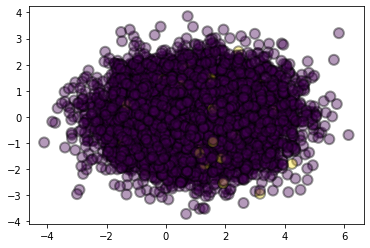

In [4]:
plt.scatter(x=X[:,0], y=X[:,1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2, alpha=0.4)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, 
                                  random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_features=2, random_state=42)

In [7]:
rfc_pred = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rfc_pred)

array([[2960,    0],
       [  36,    4]], dtype=int64)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2960
           1       1.00      0.10      0.18        40

    accuracy                           0.99      3000
   macro avg       0.99      0.55      0.59      3000
weighted avg       0.99      0.99      0.98      3000



### 전체 오버샘플링 후 데이터셋 분리

In [9]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((19720, 10), (19720,))

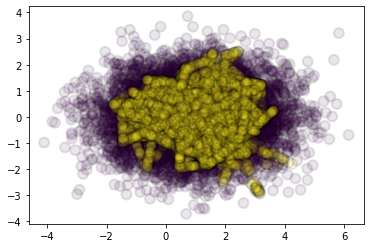

In [10]:
plt.scatter(x=X_resampled[:, 0], y=X_resampled[:, 1], 
            marker='o', c=y_resampled,
            s=100, edgecolor="k", linewidth=2, alpha=0.1)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
        y_resampled, test_size=0.3, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13804, 10), (5916, 10), (13804,), (5916,))

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, 
                                  random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=42)

In [13]:
pred = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[2965,    3],
       [  34, 2914]], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2968
           1       1.00      0.99      0.99      2948

    accuracy                           0.99      5916
   macro avg       0.99      0.99      0.99      5916
weighted avg       0.99      0.99      0.99      5916



### 계층적 샘플링 후 훈련 데이터셋 오버샘플링

In [15]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=10, n_informative=5,
                          n_redundant=0, n_clusters_per_class=1, 
                          n_classes=2, weights=[0.99, 0.01], 
                          random_state=42)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
X_resampled.shape, y_resampled.shape

((13800, 10), (13800,))

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, 
                                  random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_features=2, random_state=42)

In [25]:
pred = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, pred)

array([[2958,    0],
       [  34,    8]], dtype=int64)

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.19      0.32        42

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000



### 가중치 제어

In [28]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=10, n_informative=5,
                          n_redundant=0, n_clusters_per_class=1, 
                          n_classes=2, weights=[0.99, 0.01], 
                          random_state=42)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                             stratify=y, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, 
                                  class_weight={0:1, 1:1.4},
                                  random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2,
                       random_state=42)

In [24]:
rfc_pred = rf_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.19      0.32        42

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000

